## Multiple Disease Prediction System - 1.) Breast Cancer

In [242]:
#Importing Necessary Libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

In [243]:
#Reading The Data Using Pandas Library (Data From A csv File Into A Pandas Dataframe)

data=pd.read_csv("/content/Breast Cancer.csv")

### Dataset Link:https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

In [244]:
#Check The Type Of Data

type(data)

pandas.core.frame.DataFrame

In [245]:
#Basic Information About The Data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [246]:
#Renaming The Columns

data=data.rename(columns={"id":"ID","diagnosis":"Diagnosis","radius_mean":"Radius Mean","texture_mean":"Texture Mean","perimeter_mean":"Perimeter Mean","area_mean":"Area Mean","smoothness_mean":"Smoothness Mean","compactness_mean":"Compactness Mean","concavity_mean":"Concavity Mean","concave points_mean":"Concave Points Mean","symmetry_mean":"Symmetry Mean","compactness_mean":"Compactness Mean","concavity_mean":"Concavity Mean","concave points_mean":"Concave Points Mean","symmetry_mean":"Symmetry Mean","fractal_dimension_mean":"Fractal Dimension Mean","radius_se":"Radius SE","texture_se":"Texture SE","perimeter_se":"Perimeter SE","area_se":"Area SE","smoothness_se":"Smoothness SE","compactness_se":"Compactness SE","concavity_se":"Concavity SE","concave points_se":"Concave Points SE","symmetry_se":"Symmetry SE","fractal_dimension_se":"Fractal Dimension SE","radius_worst":"Radius Worst","texture_worst":"Texture Worst","perimeter_worst":"Perimeter Worst","area_worst":"Area Worst","smoothness_worst":"Smoothness Worst","compactness_worst":"Compactness Worst","concavity_worst":"Concavity Worst","concave points_worst":"Concave Points Worst","symmetry_worst":"Symmetry Worst","fractal_dimension_worst":"Fractal Dimension Worst","Unnamed: 32":"Unnamed:32"})

In [247]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       569 non-null    int64  
 1   Diagnosis                569 non-null    object 
 2   Radius Mean              569 non-null    float64
 3   Texture Mean             569 non-null    float64
 4   Perimeter Mean           569 non-null    float64
 5   Area Mean                569 non-null    float64
 6   Smoothness Mean          569 non-null    float64
 7   Compactness Mean         569 non-null    float64
 8   Concavity Mean           569 non-null    float64
 9   Concave Points Mean      569 non-null    float64
 10  Symmetry Mean            569 non-null    float64
 11  Fractal Dimension Mean   569 non-null    float64
 12  Radius SE                569 non-null    float64
 13  Texture SE               569 non-null    float64
 14  Perimeter SE             5

In [248]:
data.head()

,ID,Diagnosis,Radius Mean,Texture Mean,Perimeter Mean,Area Mean,Smoothness Mean,Compactness Mean,Concavity Mean,Concave Points Mean,...,Texture Worst,Perimeter Worst,Area Worst,Smoothness Worst,Compactness Worst,Concavity Worst,Concave Points Worst,Symmetry Worst,Fractal Dimension Worst,Unnamed:32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [249]:
data.tail()

,ID,Diagnosis,Radius Mean,Texture Mean,Perimeter Mean,Area Mean,Smoothness Mean,Compactness Mean,Concavity Mean,Concave Points Mean,...,Texture Worst,Perimeter Worst,Area Worst,Smoothness Worst,Compactness Worst,Concavity Worst,Concave Points Worst,Symmetry Worst,Fractal Dimension Worst,Unnamed:32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [250]:
#To Get The Statistical Insight From The Dataset

data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
Radius Mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
Texture Mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
Perimeter Mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
Area Mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
Smoothness Mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
Compactness Mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
Concavity Mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
Concave Points Mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
Symmetry Mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [251]:
#Checking Missing Values In The Dataset

data.isnull().sum()

ID                           0
Diagnosis                    0
Radius Mean                  0
Texture Mean                 0
Perimeter Mean               0
Area Mean                    0
Smoothness Mean              0
Compactness Mean             0
Concavity Mean               0
Concave Points Mean          0
Symmetry Mean                0
Fractal Dimension Mean       0
Radius SE                    0
Texture SE                   0
Perimeter SE                 0
Area SE                      0
Smoothness SE                0
Compactness SE               0
Concavity SE                 0
Concave Points SE            0
Symmetry SE                  0
Fractal Dimension SE         0
Radius Worst                 0
Texture Worst                0
Perimeter Worst              0
Area Worst                   0
Smoothness Worst             0
Compactness Worst            0
Concavity Worst              0
Concave Points Worst         0
Symmetry Worst               0
Fractal Dimension Worst      0
Unnamed:

In [252]:
#Dropping Unnwanted Columns

data.drop(labels=["ID","Unnamed:32"],axis=1,inplace=True)

In [253]:
#To See How Many Diagnosis States Are There In The Dataset

data["Diagnosis"].value_counts()

B    357
M    212
Name: Diagnosis, dtype: int64

<Axes: xlabel='Diagnosis', ylabel='count'>

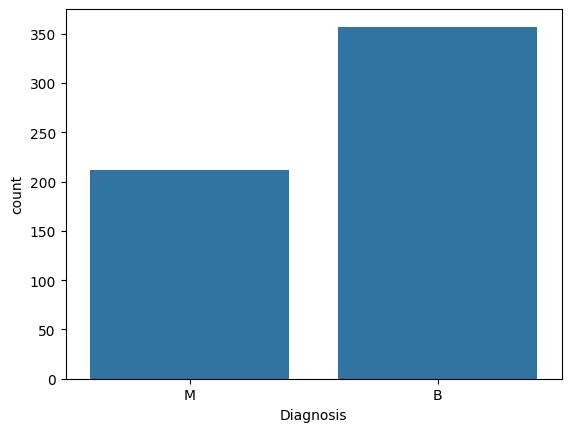

In [254]:
#Plotting The Count Plot Of Diagnosis

sns.countplot(x="Diagnosis",data=data)

In [255]:
#Label Encoding

def Diagnosis(Diagnosis):
    if (Diagnosis=="B"):
        return (0)
    else:
        return (1)

In [256]:
data["Diagnosis"]=data["Diagnosis"].apply(Diagnosis)

In [257]:
data["Diagnosis"].value_counts()

0    357
1    212
Name: Diagnosis, dtype: int64

<Axes: xlabel='Diagnosis', ylabel='count'>

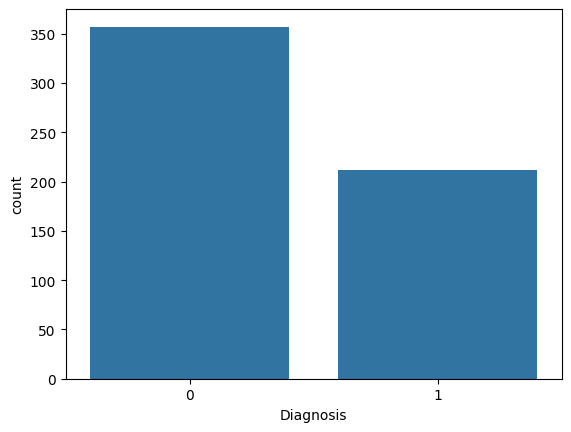

In [258]:
sns.countplot(x="Diagnosis",data=data)

B-Benign=0,
M-Malignant=1

<ipython-input-259-1e472f00d5c7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Diagnosis"])


<Axes: xlabel='Diagnosis', ylabel='Density'>

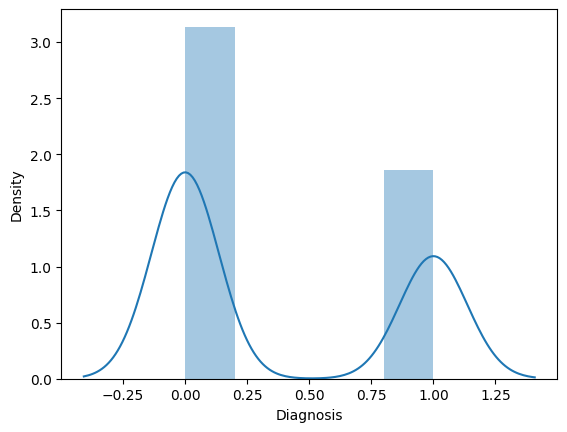

In [259]:
#Plotting The Distribution Plot Of Diagnosis

sns.distplot(data["Diagnosis"])

array([[<Axes: title={'center': 'Diagnosis'}>,
        <Axes: title={'center': 'Radius Mean'}>,
        <Axes: title={'center': 'Texture Mean'}>,
        <Axes: title={'center': 'Perimeter Mean'}>,
        <Axes: title={'center': 'Area Mean'}>,
        <Axes: title={'center': 'Smoothness Mean'}>],
       [<Axes: title={'center': 'Compactness Mean'}>,
        <Axes: title={'center': 'Concavity Mean'}>,
        <Axes: title={'center': 'Concave Points Mean'}>,
        <Axes: title={'center': 'Symmetry Mean'}>,
        <Axes: title={'center': 'Fractal Dimension Mean'}>,
        <Axes: title={'center': 'Radius SE'}>],
       [<Axes: title={'center': 'Texture SE'}>,
        <Axes: title={'center': 'Perimeter SE'}>,
        <Axes: title={'center': 'Area SE'}>,
        <Axes: title={'center': 'Smoothness SE'}>,
        <Axes: title={'center': 'Compactness SE'}>,
        <Axes: title={'center': 'Concavity SE'}>],
       [<Axes: title={'center': 'Concave Points SE'}>,
        <Axes: title={'cent

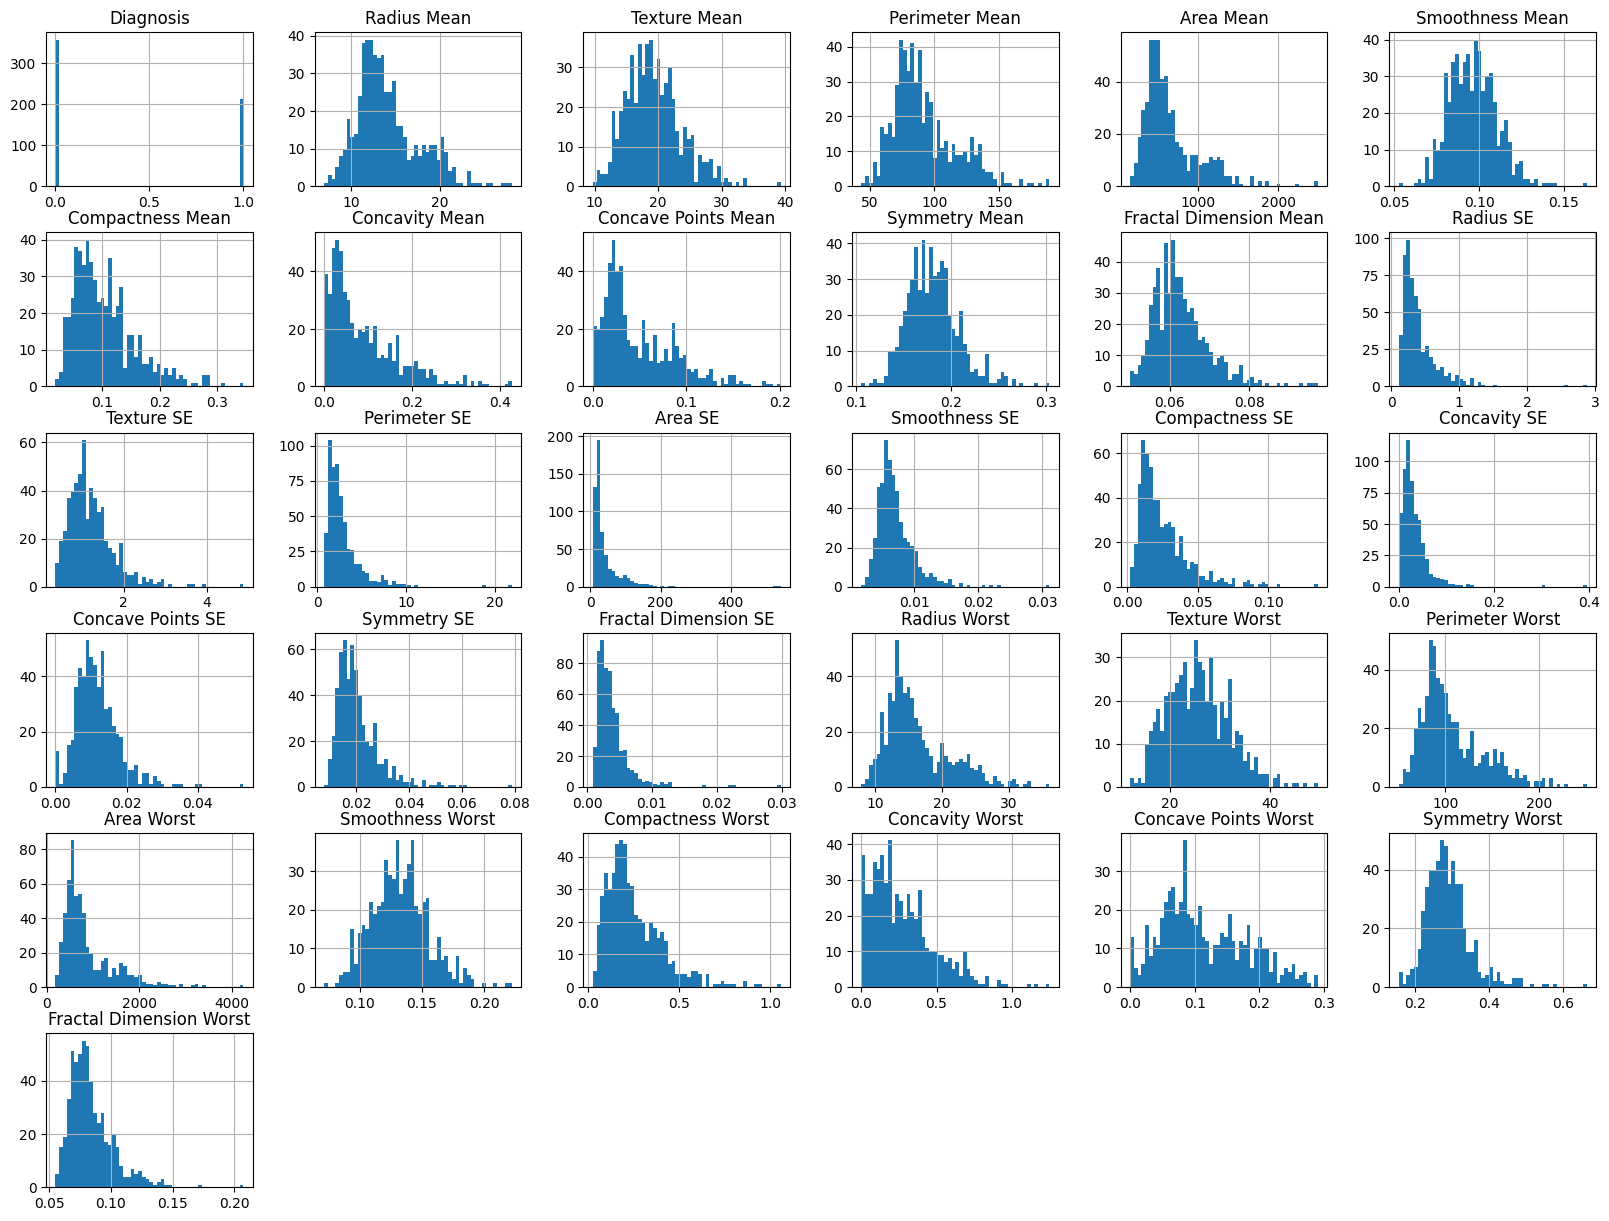

In [260]:
#Plotting The Histogram Of The Various Features

data.hist(bins=50,figsize=(20,15))

In [261]:
#Extracting Mean,Squared Error And Worst Features

data_mean=data[data.columns[:11]]
data_se=data.drop(data.columns[1:11],axis=1)
data_se=data_se.drop(data_se.columns[11:],axis=1)
data_worst=data.drop(data.columns[1:21],axis=1)

<Axes: title={'center': 'Correlation Of Mean Features With Diagnosis'}>

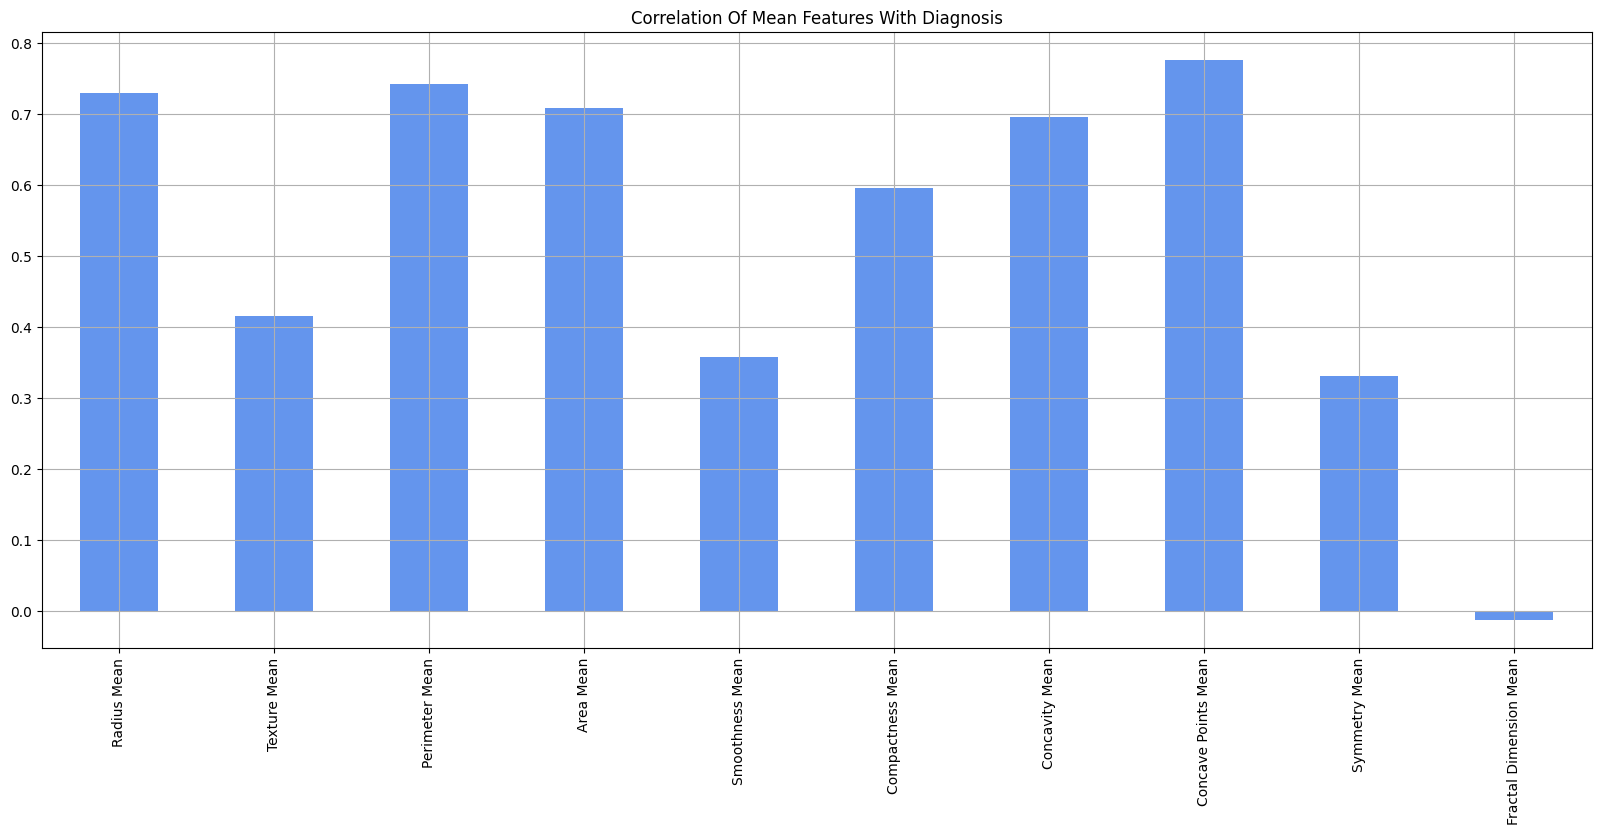

In [262]:
#Correlation Of Mean Features With Diagnosis:

plt.figure(figsize=(20,8))
data_mean.drop("Diagnosis",axis=1).corrwith(data_mean.Diagnosis).plot(kind="bar",grid=True,title="Correlation Of Mean Features With Diagnosis",color="cornflowerblue")

<Axes: title={'center': 'Correlation Of Squared Error Features With Diagnosis'}>

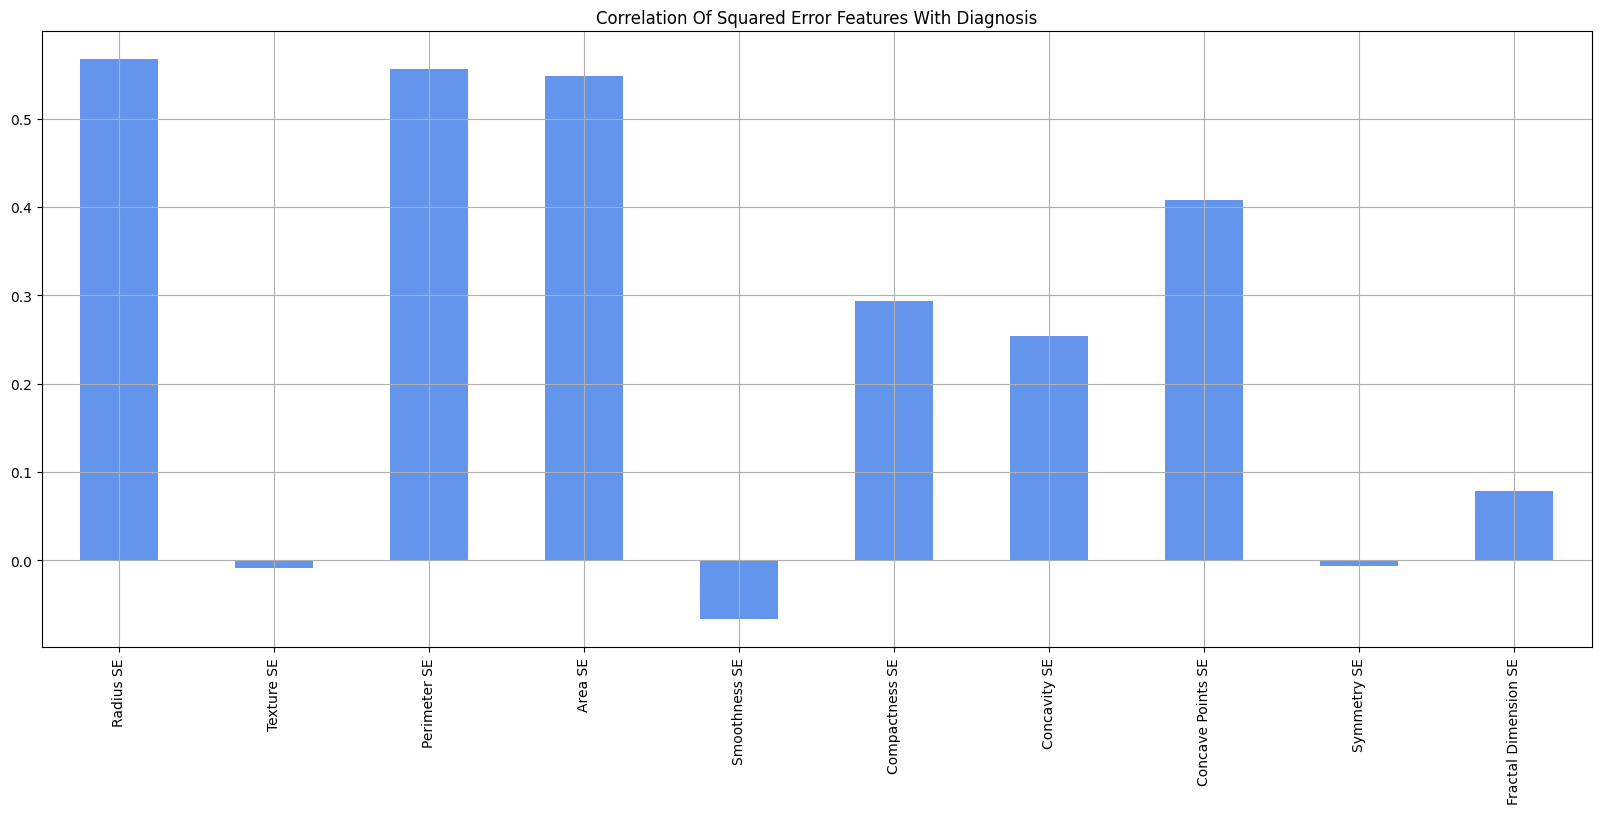

In [263]:
#Correlation Of Squared Error Features With Diagnosis

plt.figure(figsize=(20,8))
data_se.drop("Diagnosis",axis=1).corrwith(data_se.Diagnosis).plot(kind="bar",grid=True,title="Correlation Of Squared Error Features With Diagnosis",color="cornflowerblue")

<Axes: title={'center': 'Correlation Of Worst Error Features With Diagnosis'}>

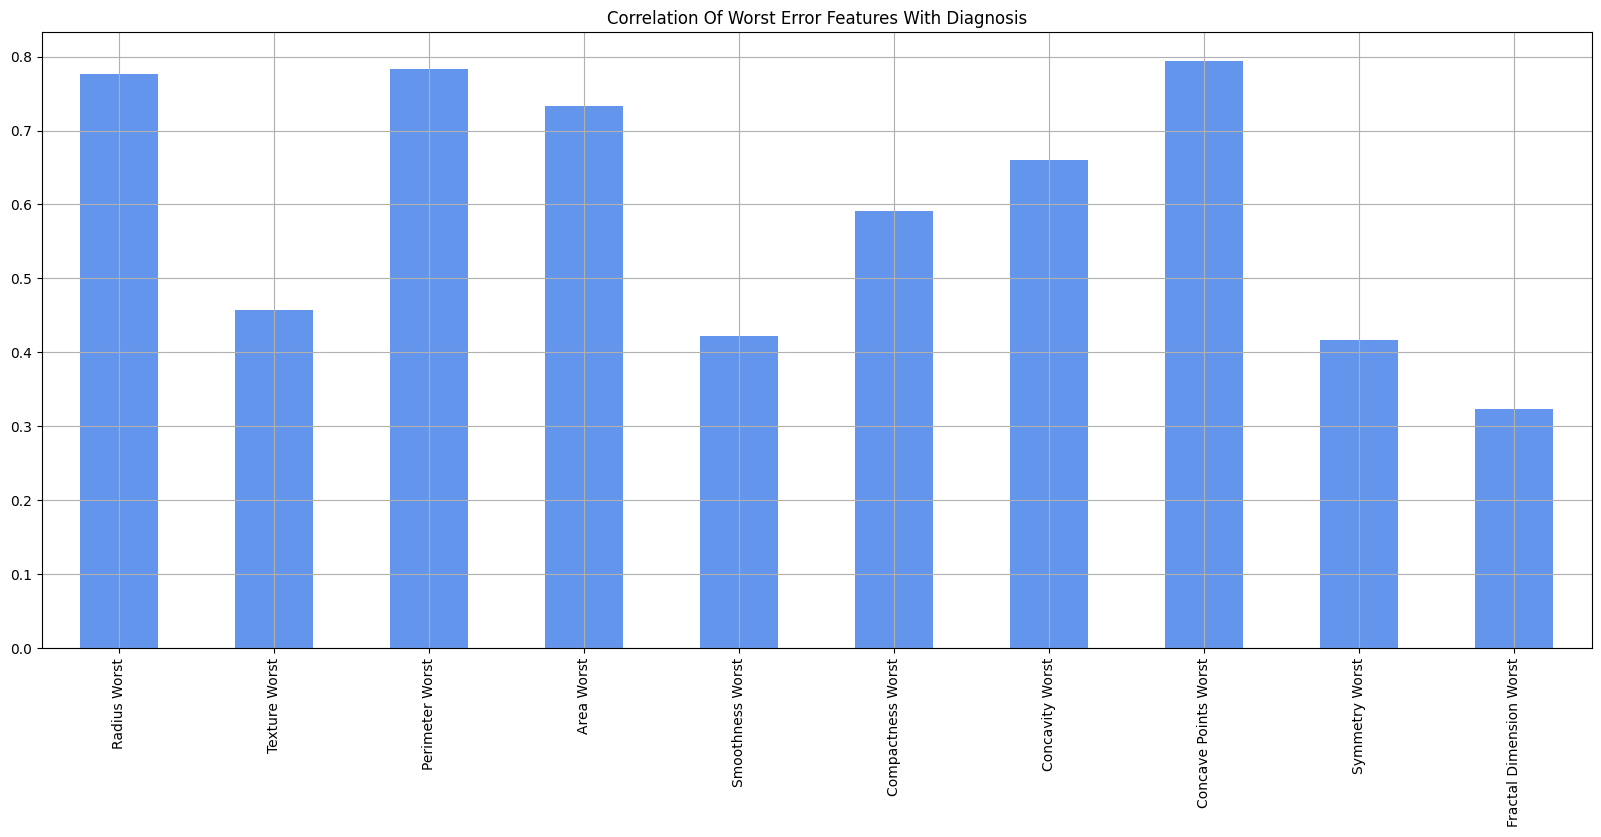

In [264]:
#Correlation Of Worst Features With Diagnosis

plt.figure(figsize=(20,8))
data_worst.drop("Diagnosis",axis=1).corrwith(data_worst.Diagnosis).plot(kind="bar",grid=True,title="Correlation Of Worst Error Features With Diagnosis",color="cornflowerblue")

In [265]:
#To Find Correlation Among The Columns In The Dataframe

corr_matrix=data.corr()
corr_matrix

,Diagnosis,Radius Mean,Texture Mean,Perimeter Mean,Area Mean,Smoothness Mean,Compactness Mean,Concavity Mean,Concave Points Mean,Symmetry Mean,...,Radius Worst,Texture Worst,Perimeter Worst,Area Worst,Smoothness Worst,Compactness Worst,Concavity Worst,Concave Points Worst,Symmetry Worst,Fractal Dimension Worst
Diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
Radius Mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
Texture Mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
Perimeter Mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
Area Mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
Smoothness Mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
Compactness Mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
Concavity Mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
Concave Points Mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
Symmetry Mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [266]:
#Plotting The Heatmap

plt.figure(figsize=(100,100))
plt.title("Correlation Plot")
sns.heatmap(data.corr(),annot=True,cmap="seismic")
plt.show()

In [267]:
#Finding The Variables Which Has The Highest Correlation With The Target Variable (Diagnosis)

corr_matrix["Diagnosis"].sort_values(ascending=False)

Diagnosis                  1.000000
Concave Points Worst       0.793566
Perimeter Worst            0.782914
Concave Points Mean        0.776614
Radius Worst               0.776454
Perimeter Mean             0.742636
Area Worst                 0.733825
Radius Mean                0.730029
Area Mean                  0.708984
Concavity Mean             0.696360
Concavity Worst            0.659610
Compactness Mean           0.596534
Compactness Worst          0.590998
Radius SE                  0.567134
Perimeter SE               0.556141
Area SE                    0.548236
Texture Worst              0.456903
Smoothness Worst           0.421465
Symmetry Worst             0.416294
Texture Mean               0.415185
Concave Points SE          0.408042
Smoothness Mean            0.358560
Symmetry Mean              0.330499
Fractal Dimension Worst    0.323872
Compactness SE             0.292999
Concavity SE               0.253730
Fractal Dimension SE       0.077972
Symmetry SE               -0

In [268]:
#Categorizing The Data

x=data.drop(columns=["Diagnosis"],axis=1)
y=data.Diagnosis

In [269]:
#Splitting The Data Into Training Set And Test Set

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [270]:
#Scaling The Data

scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.transform(x_test)

In [271]:
#Decision Tree Classifier

In [272]:
dtc=DecisionTreeClassifier(max_depth=3)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [273]:
y_pred1=dtc.predict(x_test)
print(y_pred1)

[1 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0
 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1
 0 0 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1
 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0]


In [274]:
a1=accuracy_score(y_test,y_pred1)
p1=precision_score(y_test,y_pred1)
r1=recall_score(y_test,y_pred1)
f1=f1_score(y_test,y_pred1)

In [275]:
print("Accuracy   :", a1)
print("Precision  :", p1)
print("Recall     :", r1)
print("F1-Score   :", f1)

Accuracy   : 0.9473684210526315
Precision  : 0.96875
Recall     : 0.8985507246376812
F1-Score   : 0.9323308270676692


In [276]:
#K-Nearest Neighbor Classifier

In [277]:
knnc=KNeighborsClassifier(n_neighbors=5)
knnc.fit(x_train,y_train)

KNeighborsClassifier()

In [278]:
y_pred2=knnc.predict(x_test)
print(y_pred2)

[1 0 1 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0
 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1
 0 0 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0
 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0]


In [279]:
a2=accuracy_score(y_test,y_pred2)
p2=precision_score(y_test,y_pred2)
r2=recall_score(y_test,y_pred2)
f2=f1_score(y_test,y_pred2)

In [280]:
print("Accuracy   :", a2)
print("Precision  :", p2)
print("Recall     :", r2)
print("F1-Score   :", f2)

Accuracy   : 0.9649122807017544
Precision  : 0.9846153846153847
Recall     : 0.927536231884058
F1-Score   : 0.9552238805970149


In [281]:
#Logistic Regression

In [282]:
logr=LogisticRegression(C=0.001)
logr.fit(x_train,y_train)

LogisticRegression(C=0.001)

In [283]:
y_pred3=logr.predict(x_test)
print(y_pred3)

[1 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0
 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1
 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0]


In [284]:
a3=accuracy_score(y_test,y_pred3)
p3=precision_score(y_test,y_pred3)
r3=recall_score(y_test,y_pred3)
f3=f1_score(y_test,y_pred3)

In [285]:
print("Accuracy   :", a3)
print("Precision  :", p3)
print("Recall     :", r3)
print("F1-Score   :", f3)

Accuracy   : 0.8830409356725146
Precision  : 0.9803921568627451
Recall     : 0.7246376811594203
F1-Score   : 0.8333333333333334


In [286]:
#Naive Bayes Algorithm

In [287]:
nbc=GaussianNB()
nbc.fit(x_train,y_train)

GaussianNB()

In [288]:
y_pred4=nbc.predict(x_test)
print(y_pred4)

[1 0 1 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0
 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1
 0 0 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1
 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0]


In [289]:
a4=accuracy_score(y_test,y_pred4)
p4=precision_score(y_test,y_pred4)
r4=recall_score(y_test,y_pred4)
f4=f1_score(y_test,y_pred4)

In [290]:
print("Accuracy   :", a4)
print("Precision  :", p4)
print("Recall     :", r4)
print("F1-Score   :", f4)

Accuracy   : 0.935672514619883
Precision  : 0.967741935483871
Recall     : 0.8695652173913043
F1-Score   : 0.9160305343511451


In [291]:
#Neural Network Classifier

In [292]:
nnc=MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(5,2),random_state=1)
nnc.fit(x_train,y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [293]:
y_pred5=nnc.predict(x_test)
print(y_pred5)

[1 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0
 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1
 0 0 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1
 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1
 1 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0]


In [294]:
a5=accuracy_score(y_test,y_pred5)
p5=precision_score(y_test,y_pred5)
r5=recall_score(y_test,y_pred5)
f5=f1_score(y_test,y_pred5)

In [295]:
print("Accuracy   :", a5)
print("Precision  :", p5)
print("Recall     :", r5)
print("F1-Score   :", f5)

Accuracy   : 0.9532163742690059
Precision  : 0.9420289855072463
Recall     : 0.9420289855072463
F1-Score   : 0.9420289855072463


In [296]:
#Random Forest

In [297]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [298]:
y_pred6=rfc.predict(x_test)
print(y_pred6)

[1 0 1 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0
 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1
 0 0 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1
 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0]


In [299]:
a6=accuracy_score(y_test,y_pred6)
p6=precision_score(y_test,y_pred6)
r6=recall_score(y_test,y_pred6)
f6=f1_score(y_test,y_pred6)

In [300]:
print("Accuracy   :", a6)
print("Precision  :", p6)
print("Recall     :", r6)
print("F1-Score   :", f6)

Accuracy   : 0.9532163742690059
Precision  : 0.9692307692307692
Recall     : 0.9130434782608695
F1-Score   : 0.9402985074626865


In [301]:
#Support Vector Machine

In [302]:
svm=SVC(kernel='rbf',decision_function_shape='ovo',C=1.0)
svm.fit(x_train,y_train)

SVC(decision_function_shape='ovo')

In [303]:
y_pred7=svm.predict(x_test)
print(y_pred7)

[1 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0
 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1
 0 0 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1
 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0]


In [304]:
a7=accuracy_score(y_test,y_pred7)
p7=precision_score(y_test,y_pred7)
r7=recall_score(y_test,y_pred7)
f7=f1_score(y_test,y_pred7)

In [305]:
print("Accuracy   :", a7)
print("Precision  :", p7)
print("Recall     :", r7)
print("F1-Score   :", f7)

Accuracy   : 0.9766081871345029
Precision  : 0.9850746268656716
Recall     : 0.9565217391304348
F1-Score   : 0.9705882352941176


In [306]:
#XgBoost Classifier

In [307]:
xgc=GradientBoostingClassifier()
xgc.fit(x_train,y_train)

GradientBoostingClassifier()

In [308]:
y_pred8=xgc.predict(x_test)
print(y_pred8)

[1 0 1 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0
 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1
 0 0 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1
 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0]


In [309]:
a8=accuracy_score(y_test,y_pred8)
p8=precision_score(y_test,y_pred8)
r8=recall_score(y_test,y_pred8)
f8=f1_score(y_test,y_pred8)

In [310]:
print("Accuracy   :", a8)
print("Precision  :", p8)
print("Recall     :", r8)
print("F1-Score   :", f8)

Accuracy   : 0.9473684210526315
Precision  : 0.96875
Recall     : 0.8985507246376812
F1-Score   : 0.9323308270676692


In [311]:
#Comparing Accuracy Values

Logistic Regression 0.8830409356725146
Naive Bayes 0.935672514619883
Decision Tree 0.9473684210526315
XgBoost 0.9473684210526315
Neural Network 0.9532163742690059
Random Forest 0.9532163742690059
K-Nearest Neighbor 0.9649122807017544
Support Vector Machine 0.9766081871345029


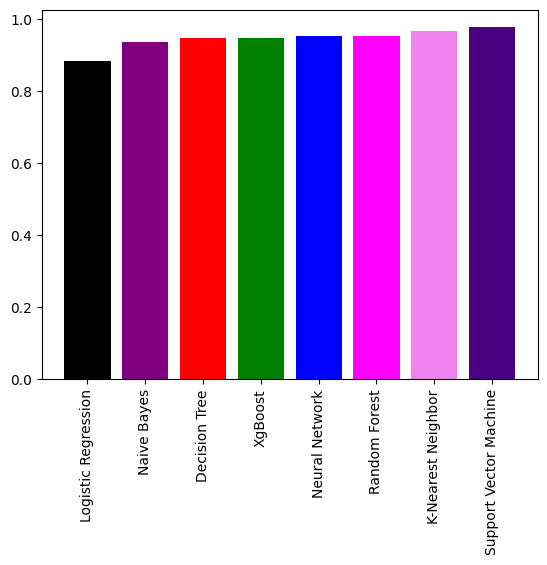

In [312]:
acc_models={"Decision Tree":a1,"K-Nearest Neighbor":a2,"Logistic Regression":a3,"Naive Bayes":a4,"Neural Network":a5,"Random Forest":a6,"Support Vector Machine":a7,"XgBoost":a8}

sorted_models=sorted(acc_models.items(),key=lambda x:x[1])

for key,value in sorted_models:
    print(key,value)

acc_models={"Decision Tree":a1,"K-Nearest Neighbor":a2,"Logistic Regression":a3,"Naive Bayes":a4,"Neural Network":a5,"Random Forest":a6,"Support Vector Machine":a7,"XgBoost":a8}

acc_keys,acc_values=zip(*sorted(zip(acc_models.keys(),acc_models.values()),key=lambda x:x[1]))

plt.bar(range(len(acc_models)),acc_values,tick_label=acc_keys,color=["black","purple","red","green","blue","magenta","violet","indigo"])
plt.xticks(rotation=90)
plt.show()

In [313]:
#Comparing Precision Values

Neural Network 0.9420289855072463
Naive Bayes 0.967741935483871
Decision Tree 0.96875
XgBoost 0.96875
Random Forest 0.9692307692307692
Logistic Regression 0.9803921568627451
K-Nearest Neighbor 0.9846153846153847
Support Vector Machine 0.9850746268656716


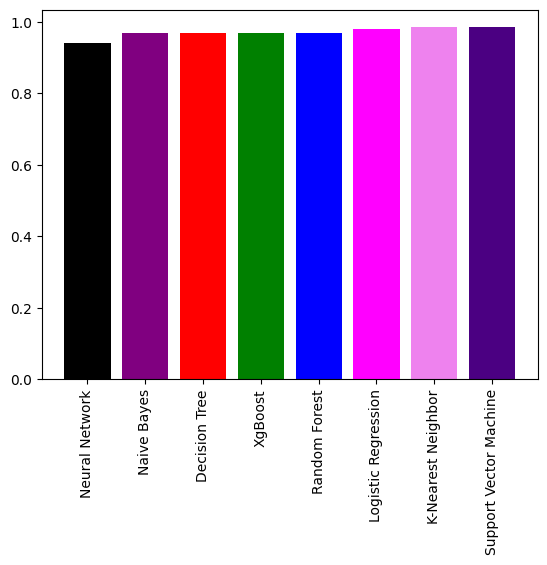

In [314]:
pre_models={"Decision Tree":p1,"K-Nearest Neighbor":p2,"Logistic Regression":p3,"Naive Bayes":p4,"Neural Network":p5,"Random Forest":p6,"Support Vector Machine":p7,"XgBoost":p8}

sorted_models=sorted(pre_models.items(),key=lambda x:x[1])

for key,value in sorted_models:
    print(key,value)

pre_models={"Decision Tree":p1,"K-Nearest Neighbor":p2,"Logistic Regression":p3,"Naive Bayes":p4,"Neural Network":p5,"Random Forest":p6,"Support Vector Machine":p7,"XgBoost":p8}

pre_keys,pre_values=zip(*sorted(zip(pre_models.keys(),pre_models.values()),key=lambda x:x[1]))

plt.bar(range(len(pre_models)),pre_values,tick_label=pre_keys,color=["black","purple","red","green","blue","magenta","violet","indigo"])
plt.xticks(rotation=90)
plt.show()

In [315]:
#Comparing Recall Values

Logistic Regression 0.7246376811594203
Naive Bayes 0.8695652173913043
Decision Tree 0.8985507246376812
XgBoost 0.8985507246376812
Random Forest 0.9130434782608695
K-Nearest Neighbor 0.927536231884058
Neural Network 0.9420289855072463
Support Vector Machine 0.9565217391304348


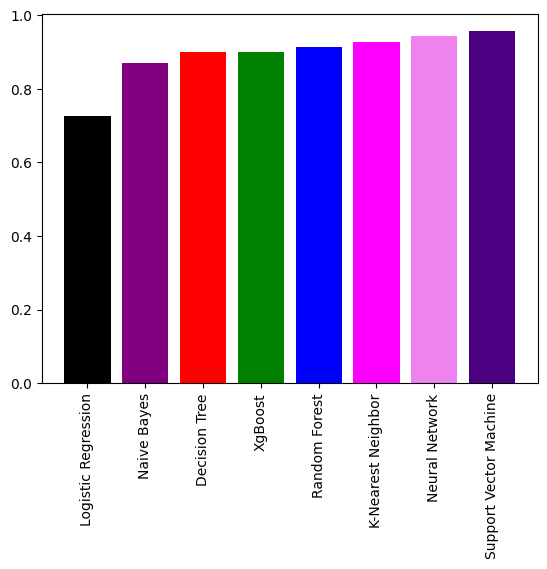

In [316]:
rec_models={"Decision Tree":r1,"K-Nearest Neighbor":r2,"Logistic Regression":r3,"Naive Bayes":r4,"Neural Network":r5,"Random Forest":r6,"Support Vector Machine":r7,"XgBoost":r8}

sorted_models=sorted(rec_models.items(),key=lambda x:x[1])

for key,value in sorted_models:
    print(key,value)

rec_models={"Decision Tree":r1,"K-Nearest Neighbor":r2,"Logistic Regression":r3,"Naive Bayes":r4,"Neural Network":r5,"Random Forest":r6,"Support Vector Machine":r7,"XgBoost":r8}

rec_keys,rec_values=zip(*sorted(zip(rec_models.keys(),rec_models.values()),key=lambda x:x[1]))

plt.bar(range(len(rec_models)),rec_values,tick_label=rec_keys,color=["black","purple","red","green","blue","magenta","violet","indigo"])
plt.xticks(rotation=90)
plt.show()

In [317]:
#Comparing F1-Score

Logistic Regression 0.8333333333333334
Naive Bayes 0.9160305343511451
Decision Tree 0.9323308270676692
XgBoost 0.9323308270676692
Random Forest 0.9402985074626865
Neural Network 0.9420289855072463
K-Nearest Neighbor 0.9552238805970149
Support Vector Machine 0.9705882352941176


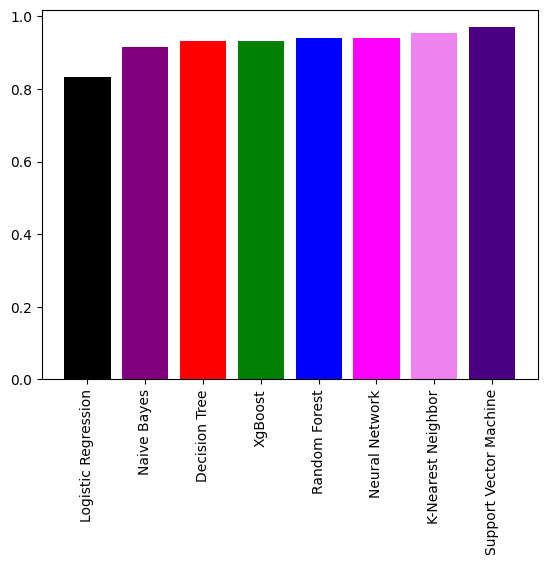

In [318]:
f1_models={"Decision Tree":f1,"K-Nearest Neighbor":f2,"Logistic Regression":f3,"Naive Bayes":f4,"Neural Network":f5,"Random Forest":f6,"Support Vector Machine":f7,"XgBoost":f8}

sorted_models=sorted(f1_models.items(),key=lambda x:x[1])

for key,value in sorted_models:
    print(key,value)

f1_models={"Decision Tree":f1,"K-Nearest Neighbor":f2,"Logistic Regression":f3,"Naive Bayes":f4,"Neural Network":f5,"Random Forest":f6,"Support Vector Machine":f7,"XgBoost":f8}

f1_keys,f1_values=zip(*sorted(zip(f1_models.keys(),f1_models.values()),key=lambda x:x[1]))

plt.bar(range(len(f1_models)),f1_values,tick_label=f1_keys,color=["black","purple","red","green","blue","magenta","violet","indigo"])
plt.xticks(rotation=90)
plt.show()

In [319]:
#Plotting All Accuracy,Precision,Recall And F1-Score Of All The Models

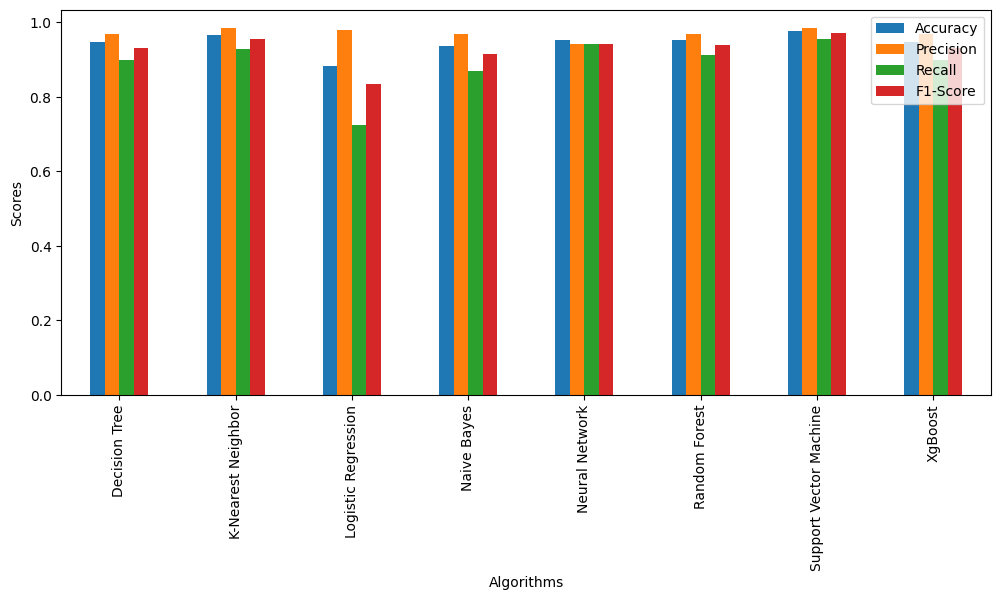

In [320]:
models_data=pd.DataFrame([["Decision Tree",a1,p1,r1,f1],["K-Nearest Neighbor",a2,p2,r2,f2],["Logistic Regression",a3,p3,r3,f3],["Naive Bayes",a4,p4,r4,f4],["Neural Network",a5,p5,r5,f5],["Random Forest",a6,p6,r6,f6],["Support Vector Machine",a7,p7,r7,f7],["XgBoost",a8,p8,r8,f8]],columns=["Scores","Accuracy","Precision","Recall","F1-Score"])
models_data.plot(x="Scores",kind="bar",stacked=False,xlabel="Algorithms",ylabel="Scores",figsize=(12,5))
plt.show()

In [321]:
#Saving The Trained Model

import pickle

filename="Breast_Cancer.sav"
pickle.dump(svm,open(filename,"wb"))

filename="Breast_Cancer_Scale.sav"
pickle.dump(scale,open(filename,"wb"))

In [322]:
#Loading The Saved Model

loaded_model=pickle.load(open("Breast_Cancer.sav","rb"))
loaded_model=pickle.load(open("Breast_Cancer_Scale.sav","rb"))